In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy import stats
from PIL import ImageDraw

In [16]:
#load the sundial garden image
img = mpimg.imread('edinburgh_park.png')

In [17]:
image_path = 'edinburgh_park.png'
image = Image.open(image_path) 

In [6]:
image.show()

In [18]:
gray_image = image.convert('L') #grayscale the image
gray_image.show()

In [19]:
gray_array = np.array(gray_image)
print(gray_array.shape) #print shape

(607, 1013)


In [20]:
#num cells with value of 0
num_zeros = np.sum(gray_array == 0)
print(num_zeros // 10)

23358


In [21]:
def majority_value(square):
    """
    determine the majority value in a square of 5x5 cells (pixels)
    """
    mode_val = stats.mode(square.flatten(), axis=None)[0]
    return mode_val

In [22]:
def image_to_grid(image_path, block_size=5):
    """
    Convert an image to a grid of majority values in blocks of a given size.

    Args:
        image_path (str): The path to the image file.
        block_size (int): The size of the blocks for the majority calculation.
        return: grid
    """
     # Load the image and convert to grayscale
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    
    # Calculate the size of the new grid
    new_width = image_array.shape[1] // block_size
    new_height = image_array.shape[0] // block_size
    
    # Create an empty array for the new grid
    grid = np.zeros((new_height, new_width), dtype=np.uint8)
    
    # Process the image in blocks
    for i in range(0, image_array.shape[0], block_size):
        for j in range(0, image_array.shape[1], block_size):
            # Extract the block
            block = image_array[i:i+block_size, j:j+block_size]
            
            # Check if the block is smaller than the expected size (at edges)
            if block.shape[0] == block_size and block.shape[1] == block_size:
                # Find the majority value in the block and assign it to the grid cell
                grid[i//block_size, j//block_size] = majority_value(block)
    
    return grid

In [23]:
image_path = 'edinburgh_park.png'
grid = image_to_grid(image_path, block_size=5)
print(grid)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [24]:
grid.shape

(121, 202)

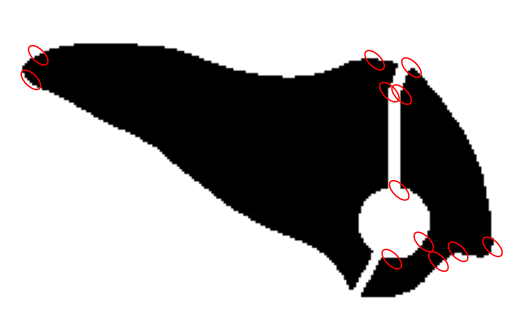

In [25]:
from matplotlib.patches import Ellipse

plt.imshow(grid, cmap='gray')  # Plot the grid

#ellipses parameters: (x_center, y_center, width, height, angle)
ellipses = [
    (793//5, 367//5, 10, 5, 45),  
    (797//5, 170//5, 10, 5, 45), 
    (816//5, 117//5, 10, 5, 45),
    (980//5, 484//5, 10, 5, 45),
    (742//5, 100//5, 10, 5, 45),
    (770//5, 165//5, 10, 5, 45),
    (872//5, 512//5, 10, 5, 45),
    (777//5, 508//5, 10, 5, 45),
    (844//5, 473//5, 10, 5, 45),
    (913//5, 493//5, 10, 5, 45),
    (57//5, 91//5, 10, 5, 45),
    (42//5, 142//5, 10, 5, 45)
]

ax = plt.gca() 

for x, y, width, height, angle in ellipses:
    ellipse = Ellipse(xy=(x, y), width=width, height=height, angle=angle, edgecolor='r', fc='None', lw=1)
    ax.add_patch(ellipse)

plt.axis('off')
plt.savefig('garden_check.jpg')
plt.show()

In [16]:
#save the grid as a json file
import json
with open("park_grid.json", "w") as f:
    json.dump(grid.tolist(), f)